In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
VP = lambda duvp, dupr: (duvp / dupr) * 100

In [3]:
A = lambda dvp1, dvp2, dpr: ((dvp1 - dvp2) / dpr) * 100

In [4]:
Astar = lambda a, p: a / p

In [5]:
#math.log(15) - math.log(3) #= #b * math.log(0.3) - b
#b = (math.log(15) - math.log(3)) / (math.log(0.3))
#b
a = math.log(3)
b = (math.log(15) - math.log(3)) / math.log(0.3)
a, b

#Найти b от А
#f(A, KF) = k * ln(A) + b * 

(1.0986122886681098, -1.3367726468997532)

In [6]:
b = (math.log(5) - math.log(1.5)) / (math.log(1.5) - math.log(3.7))
a = math.log(1.5) / (b * math.log(4))
a, b

(-0.21933375590642779, -1.3334985723098478)

(-0.19048759382435695, -1.5354346416400562)

In [8]:
# a(200) = 1.09
# a(100) = -0.219


C:\Users\archy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\Users\archy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


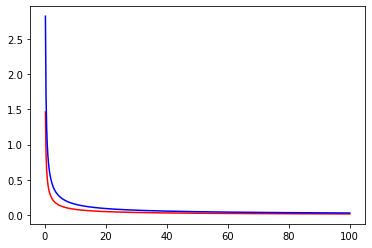

In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt
x = np.linspace(0,100, 500)
y1 = np.e ** ((np.log(x) + 1.098612288668109) / -1.3367726468997532)
y2 = np.e ** ((np.log(x) + 0.21933375590642779) / -1.3367726468997532) #1.0986122886681098 - 1.3367726468997532 * x
plt.plot(x, y1, 'r')
plt.plot(x, y2, 'b')

C:\Users\archy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
C:\Users\archy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
C:\Users\archy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


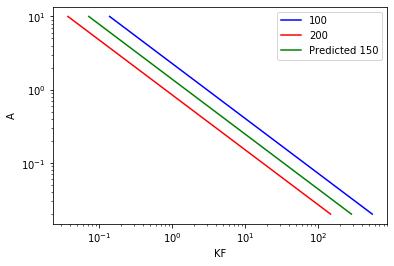

In [10]:
A = np.linspace(0, 10, 500)#np.array([0, 0.15, 0.3, 0.5, 1.0, 1.5, 2.0, 3.0, 5.0, 10.0])

fig, ax = plt.subplots()

a, b = (1.0986122886681098, -1.3367726468997532) #(-0.21933375590642779, -1.3334985723098478)
KF = np.e ** (a + b * np.log(A))

ax.plot(KF, A, 'b', label='100')

a, b = (-0.21933375590642779, -1.3367726468997532)
KF = np.e ** (a + b * np.log(A))

ax.plot(KF, A, 'r', label='200')

a, b = ((1.0986122886681098 -0.21933375590642779) / 2 , -1.3367726468997532)
KF = np.e ** (a + b * np.log(A))

ax.plot(KF, A, 'g', label='Predicted 150')



ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel('KF')
plt.ylabel('A')
plt.legend()

In [17]:
#GRID_OPT
OPT_K = np.linspace(0, 100, 200)
OPT_C = np.linspace(-2, 2, 200)
OPT_K2 = np.linspace(-1, 1, 100)

p = np.array([200, 100, 50, ])
b = np.array([-0.21933375590642779, 1.0986122886681098, 2.72927405])
MIN_MSE = 10000
for i in range(200):
    for j in range(200):
        for k in range(100):
            MSE = np.mean((b - (np.e ** (OPT_K[i] / p) / OPT_K2[k] + OPT_C[j])) ** 2)
            if MSE < MIN_MSE:
                MIN_MSE = MSE
                K, C, K2 = OPT_K[i], OPT_C[j], OPT_K2[k]
MIN_MSE, K, C, K2
            

(0.072375596353145, 55.778894472361806, -2.0, 0.6363636363636365)

In [33]:
import math
def solve_eq(A1, A2, KF1, KF2):
    b = (math.log(KF1) - math.log(KF2)) / (math.log(A1) - math.log(A2))
    a = math.log(KF2) - b * math.log(A2)
    return a, b

In [162]:
#200
a1 = solve_eq(1.01, 0.3, 3, 15)
a1

(1.1118045899368296, -1.325815338544183)

In [165]:
#100
a2_1 = solve_eq(0.5, 1, 20.374, 8.490)
a2_2 = solve_eq(0.5, 1.5, 20.374, 5.323)
a2_3 = solve_eq(0.5, 3, 20.374, 2.019)
a2_4 = solve_eq(1, 1.5, 8.490, 5.323)

a2_1, a2_2, a2_3, a2_4

((2.138889000323256, -1.2628927915965376),
 (2.167411451876846, -1.2217435921861777),
 (2.1199884859596647, -1.2901604699391414),
 (2.138889000323256, -1.1513985711640942))

In [125]:
#50
a3 = solve_eq(0.95, 6.79, 14, 1.5)[0]

In [155]:
#20
a4_1 = solve_eq(1.47, 3, 14.44, 5.53)[0]
a4_2 = solve_eq(1.47, 5, 14.44, 2.8)[0]
a4_3 = solve_eq(3, 5, 5.53, 2.8)[0]
a4 = (a4_1 + a4_2 + a4_3) / 3
a4

a4_1 = solve_eq(1.47, 3, 14.44, 5.53)[1]
a4_2 = solve_eq(1.47, 5, 14.44, 2.8)[1]
a4_3 = solve_eq(3, 5, 5.53, 2.8)[1]
k_c = (a4_1 + a4_2 + a4_3) / 3
k_c

-1.3392612376400044

In [151]:
#plt.plot([50, 100, 200], [a3, a2, a1], 'r')
func = lambda p, k1, k2: k1 + p * k2 # k1 / (np.e ** (p * k2)) + k3 #k1 / (p + k2) - k3
k1 = np.linspace(2, 5, 500)
k2 = np.linspace(-1, 1, 500)


p = np.array([20, 50, 100, 200])
b = np.array([a4, a3, a2, a1])

k_1, k_2, k_3 = 0, 0, 0
MSE_MIN = 3000
for i in k1:
    for j in k2:
        MSE = np.mean((b - func(p, i, j)) ** 2)
        if MSE < MSE_MIN:
            MSE_MIN = MSE
            k_1, k_2 = i, j
print(MSE_MIN, k_1, k_2)
                

0.013977501276073029 3.1843687374749496 -0.010020040080160442


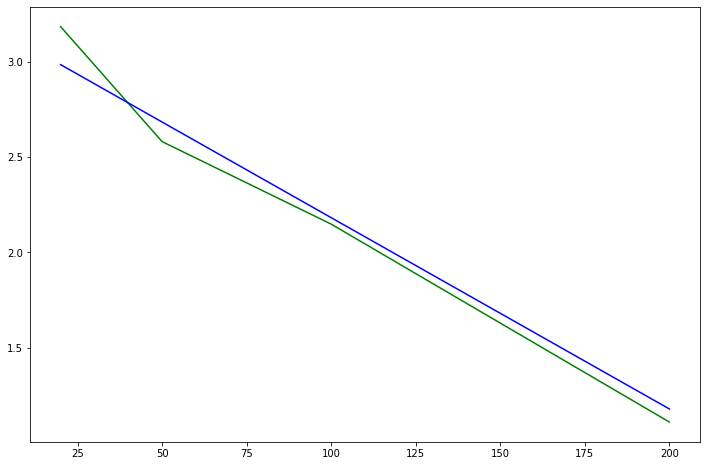

In [152]:
plt.figure(figsize=(12, 8))
plt.plot(p, b, 'g')

plt.plot(np.linspace(20, 200, 500), func(np.linspace(20, 200, 500), k_1, k_2), 'b')
                